In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

In [4]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')

In [5]:
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [8]:
#Verify the data types of the columns
print(train_df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Data Visualization ###

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

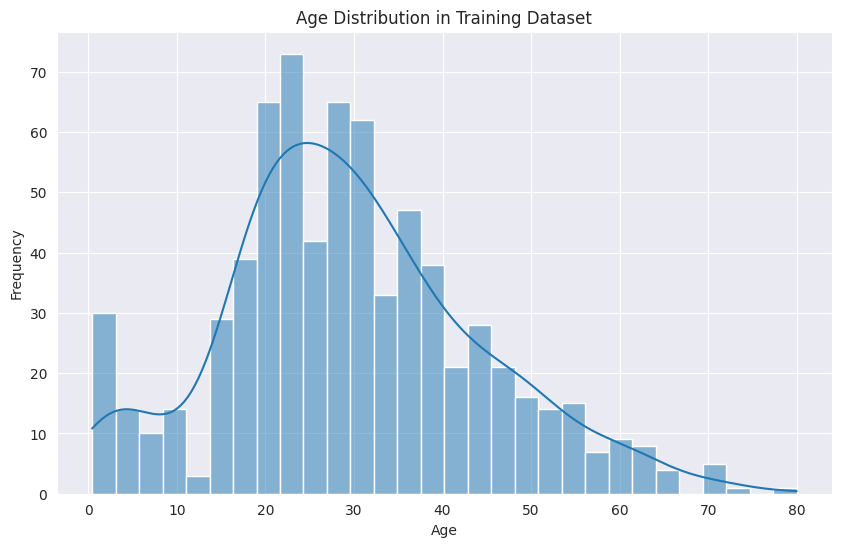

In [11]:
# Visualize the distribution of the 'Age' column in the training dataset
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution in Training Dataset')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

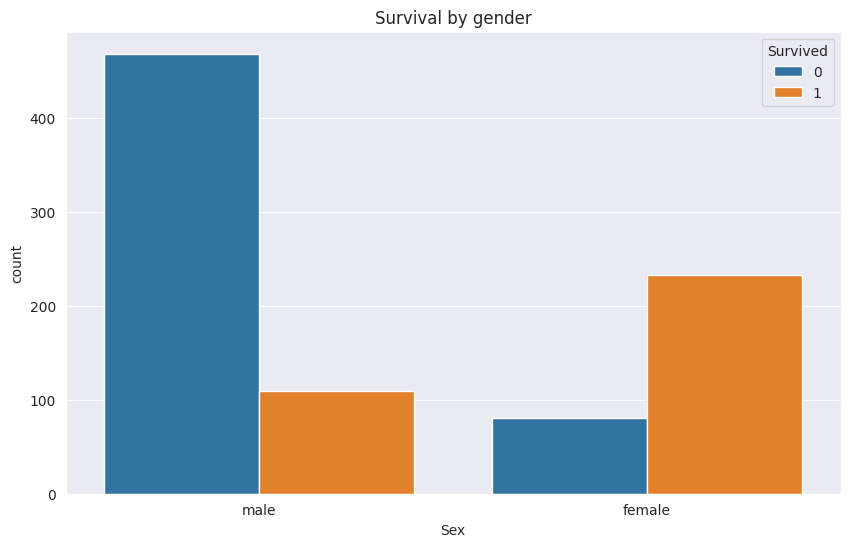

In [12]:
# Visualize the distribution of the 'Sex' column in the training dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x = 'Sex', hue='Survived')
plt.title('Survival by gender')
plt.show()

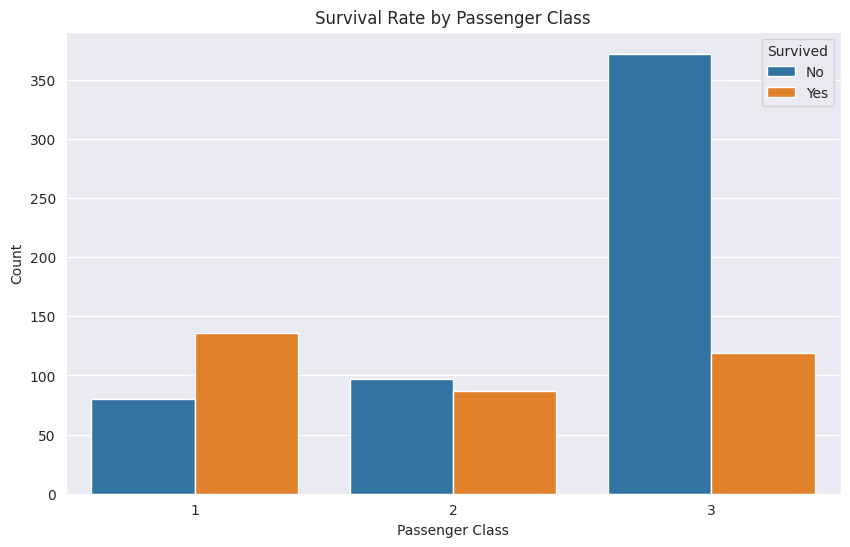

In [13]:
# Visualize the survival rate by passenger class
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Pclass', hue='Survived')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

### Data Preprocessing

In [40]:
# Drop the 'PassengerId', 'Name' and 'Ticket' columns from both datasets, as it is not useful for training
train_df = train_df.drop(columns=['PassengerId', 'Name', 'Ticket'])
test_df = test_df.drop(columns=['PassengerId', 'Name', 'Ticket'])

In [41]:
# Convert categorical columns to string type
cat_cols = ['Pclass']
train_df[cat_cols] = train_df[cat_cols].astype(str)
test_df[cat_cols] = test_df[cat_cols].astype(str)

In [42]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Cabin
0,0,3,male,22.0,1,0,NaN
1,1,1,female,38.0,1,0,C85
2,1,3,female,26.0,0,0,NaN
3,1,1,female,35.0,1,0,C123
4,0,3,male,35.0,0,0,NaN


In [43]:
# Count the nan values in the train dataset in each column
train_df.isna().sum().sort_values(ascending=False)

Cabin       687
Age         177
Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
dtype: int64

In [44]:
# Count the nan values in the test dataset in each column
test_df.isna().sum().sort_values(ascending=False)

Cabin     327
Age        86
Pclass      0
Sex         0
SibSp       0
Parch       0
dtype: int64

In [45]:
# Remove the 'Cabin' column in both datasets, as it has too many missing values
train_df = train_df.drop(columns=['Cabin'])
test_df = test_df.drop(columns=['Cabin'])

In [46]:
# Fill missing values in 'Age' with the median age

## If this is not a good strategy, I will remove the rows

train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())

In [ ]:
# Show the embarked values in the 'Embarked' column that is missing
train_df[train_df['Embarked'].isna()]

In [16]:
# Fill missing values in 'Embarked' in the train dataset with the most common value
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [17]:
# Fill missing values in 'Fare' in the test dataset with the median fare
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

In [48]:
# Verify that there are no more missing values in the train dataset
train_df.isna().sum().sort_values(ascending=False)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
dtype: int64

In [19]:
# Verify that there are no more missing values in the test dataset
test_df.isna().sum().sort_values(ascending=False)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Model Training ###

In [49]:
# Convert the target to a categorical feature and define target variable
train_df['Survived'] = train_df['Survived'].astype('str')
X_train = train_df.drop(columns=['Survived'])
y_train = train_df['Survived']

Creation of a preprocessing pipeline

In [54]:
# Identify categorical and numerical columns

categorical_features = ['Pclass', 'Sex', 'Embarked']
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

In [55]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

In [74]:
# Final pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=10, random_state=42))
])

In [75]:
# Train the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=10,
                                        random_state=42))])

In [76]:
# Accuracy of the model on the training set
train_accuracy = pipeline.score(X_train, y_train)
print(f'Training accuracy: {train_accuracy:.2f}')

Training accuracy: 0.84


In [77]:
# Test the model on the test dataset and convert to dataframe
predictions = pipeline.predict(test_df)
predictions_df = pd.DataFrame(predictions, columns=['Survived'])
predictions_df.dtypes

Survived    object
dtype: object

In [78]:
# Compare the predictions with the expected output
submission_df = pd.read_csv('data/gender_submission.csv')
submission_df = submission_df.drop(columns=['PassengerId'])
#Convert the 'Survived' column to string type for comparison
submission_df['Survived'] = submission_df['Survived'].astype('str')
correct_predictions = (submission_df == predictions_df).sum() # Count the number of correct predictions

accuracy = correct_predictions / len(predictions_df)  # Calculate the accuracy
print(f"Accuracy: {accuracy['Survived']:.2%}")  # Print

Accuracy: 93.78%


In [28]:
# Save the model to a file
joblib.dump(pipeline, 'titanic_pipeline.joblib')
print("Model 'titanic_pipeline.joblib' saved successfully!")

Modelo 'titanic_pipeline.joblib' salvo com sucesso! Pronto para o PyScript.


In [36]:
# Add the predictions to the test dataset to future comparison
compare_df = test_df.copy()
compare_df['Survived (predicted)'] = predictions_df['Survived']
compare_df['Survived (expected)'] = submission_df['Survived']

# Move the last two columns to the front
columns_to_move = compare_df.columns.tolist()
columns_to_move = columns_to_move[-2:] + columns_to_move[:-2]
compare_df = compare_df[columns_to_move]
compare_df.head()


,Survived (predicted),Survived (expected),Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,male,34.5,0,0,7.8292,Q
1,0,1,3,female,47.0,1,0,7.0000,S
2,0,0,2,male,62.0,0,0,9.6875,Q
3,0,0,3,male,27.0,0,0,8.6625,S
4,0,1,3,female,22.0,1,1,12.2875,S
